In [131]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [133]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [134]:
sel_tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,4MidkNeonif4PcWSjkwOb7,Don’t,"2e4G04F77jxVuDYo44TCSm,7bmYpVgQub656uNTu6qGNQ","Loco,Hwa Sa"
2,5WitNasXEIRptoLIQUcXMx,Décalcomanie,0XATRDCYuuGhk0oE7C0o5G,MAMAMOO


In [135]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.377,0,0.0927,0.428,97.133
1,4MidkNeonif4PcWSjkwOb7,0.849,0.486,1,-7.049,0.0669,0.538,0,0.1270,0.546,92.022
2,5WitNasXEIRptoLIQUcXMx,0.648,0.859,10,-2.384,0.0472,0.113,0,0.4480,0.541,115.434


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [136]:
recos.head()

,id,name,artists,artists_name
0,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,6z1kLsntE7FuzKZHZWrXYN,instagram,3eCd0TZrBPm2n9cDG6yWfF,DEAN
2,2xYnqYBNL62ypPiA0wjD0s,AUTOMATIC,0LyfQWJT6nXafLPZqxe9Of,Various Artists
3,2IgbYlOlFpiSFYnsqB39lM,Jasmine,0siBQaURCli5wn2lqv8WZg,DPR LIVE
4,1cgBWgoL6520lR2QZDzdGN,MOVE,13rF01aOogvnkuQXOlgTW8,TAEMIN


In [137]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.2450,0.0,0.0735,0.509,96.176
1,6z1kLsntE7FuzKZHZWrXYN,0.463,0.566,8,-6.195,0.1450,0.1960,0.0,0.2840,0.219,93.921
2,2xYnqYBNL62ypPiA0wjD0s,0.720,0.703,8,-5.281,0.0409,0.1330,0.0,0.1210,0.492,99.999
3,2IgbYlOlFpiSFYnsqB39lM,0.597,0.486,8,-5.893,0.0986,0.3310,0.0,0.1400,0.397,137.680
4,1cgBWgoL6520lR2QZDzdGN,0.697,0.713,8,-5.273,0.1150,0.0153,0.0,0.0857,0.667,99.964


### norm data
- 정규화

In [138]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.042279,0.653147,0.727273,0.533123,0.624612,0.424788,0.0,0.075225,0.360190,0.250983
1,4MidkNeonif4PcWSjkwOb7,0.862132,0.320280,0.090909,0.433042,0.119108,0.606374,0.0,0.118014,0.500000,0.204483
2,5WitNasXEIRptoLIQUcXMx,0.492647,0.841958,0.909091,0.907031,0.063506,0.127031,0.0,0.518463,0.494076,0.417482
3,2PcJoVkfjcbvoqBxV1Nj7y,0.428309,0.574825,0.727273,0.451534,0.683884,0.275909,0.0,0.051272,0.456161,0.242276
4,6z1kLsntE7FuzKZHZWrXYN,0.152574,0.432168,0.727273,0.519813,0.339543,0.220644,0.0,0.313872,0.112559,0.221760


### 추천된 데이터들의 audio features 시각화

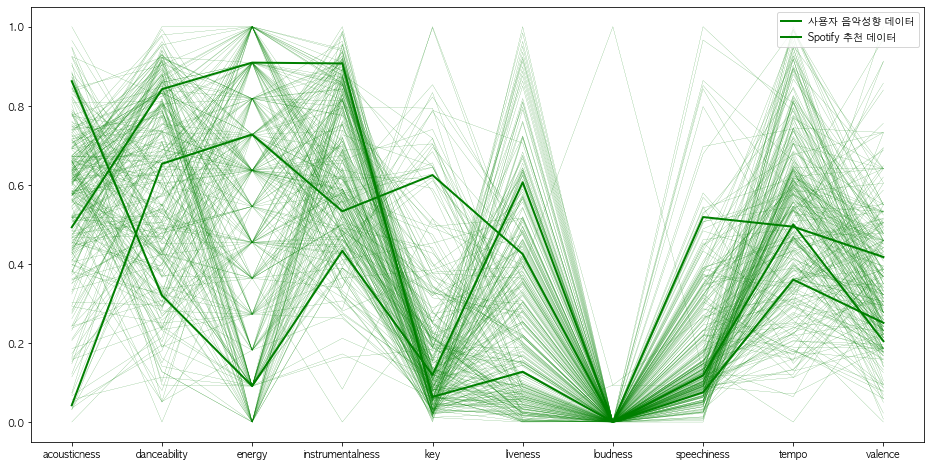

In [139]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

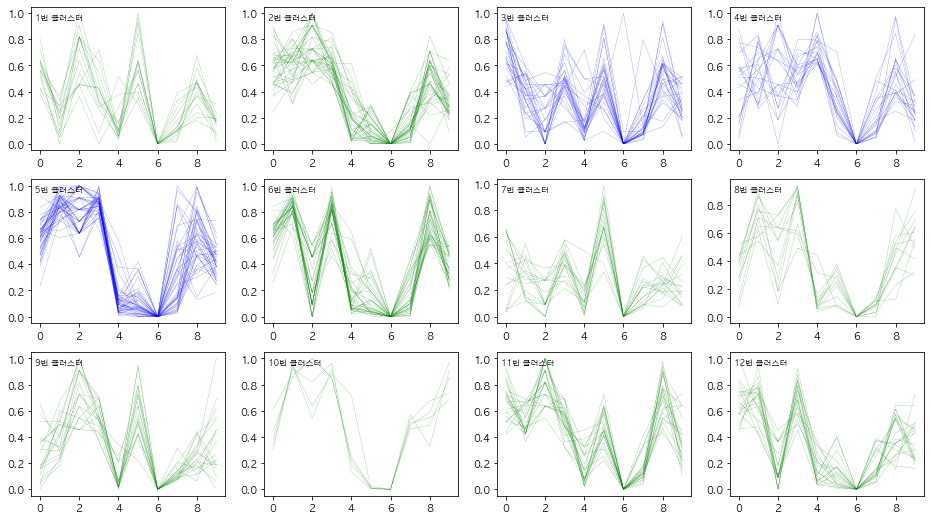

In [140]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)

In [141]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

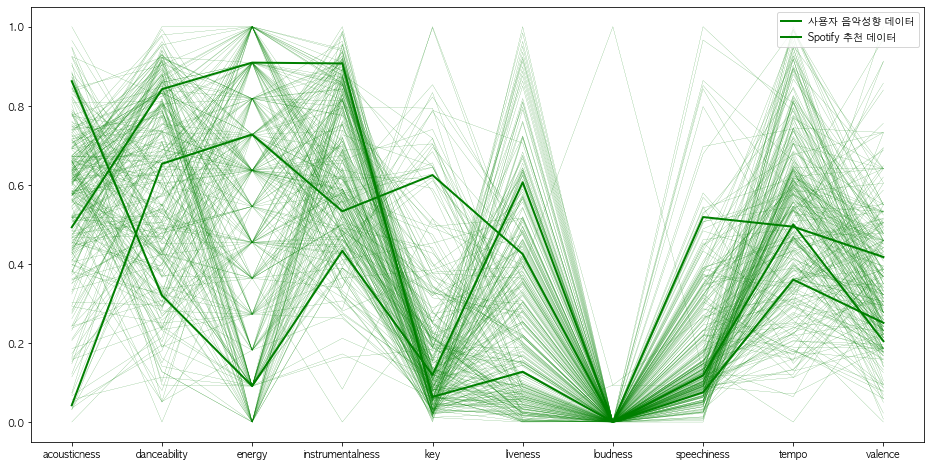

In [142]:
utils.visual_norm_data(sel_tracks, norm_features)

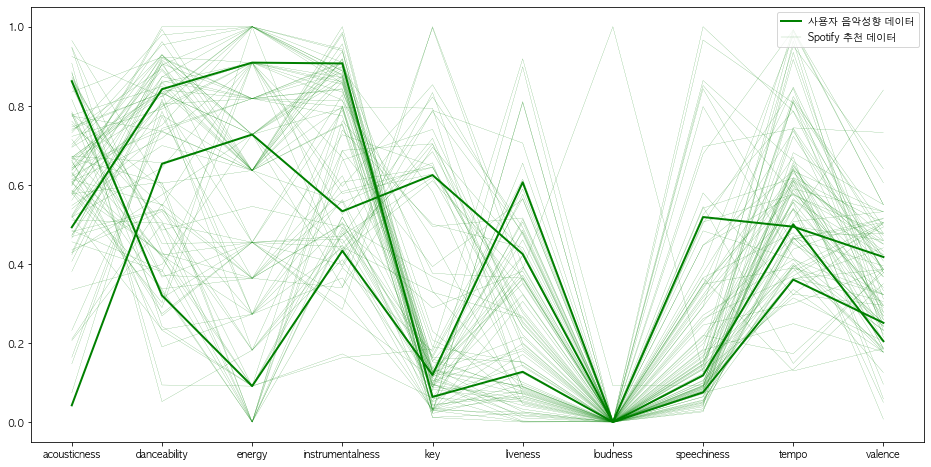

,id,name,artists,artists_name
0,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park
8,0aLqNqF7BeSrMBHoWj0aba,나빠,6aLdhHUqgdKE86xbtNmY8g,Crush
9,5quFr5s5PXYfUX5jV2EBZ1,GANADARA (Feat. IU),4XDi67ZENZcbfKnvMnTYsI,Jay Park
13,4koDrJbYxIlcDY4gu2a4I8,WHO DO U LOVE? (feat. French Montana),4TnGh5PKbSjpYqpIdlW5nz,Monsta X
22,44f1TNdoQUgf3PUYraCTsH,BLACK,30b9WulBM8sFuBo17nNq9c,G-DRAGON


In [143]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [144]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(62398a5f01a3618816f027ae)에
추천 플레이리스트 MuLetter(62398a7b01a3618816f027b2)가 등록되었습니다.


In [148]:
genres

,count
k-pop,4


In [149]:
spotify.get_genres(token,recos[reco_musics])

,count
k-pop,80
pop,1
